# Metal Design

In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '5mm'
design.chips.main.size['size_y'] = '2.5mm'


gui = MetalGUI(design)

In [3]:
design.overwrite_enabled = True
design.delete_all_components()

In [4]:
from qiskit_metal.qlibrary.lumped.cap_n_interdigital import CapNInterdigital

Cap= CapNInterdigital(design, 'Cap', options= dict(south_width='78um',south_gap='6um',
                                                   north_width='78um', north_gap='6um',
                                                   cap_gap_ground='6um',cap_width='13.2um', 
                                                   cap_gap='3um', chip='main',
                                                   cap_distance='49.3um',
                                                   pos_x='-1.620mm', pos_y='0mm', orientation='90', 
                                                   finger_length = '92um', trace_width='1um'))

gui.rebuild()

In [5]:
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled
p1 = LaunchpadWirebond(design, 'P1', options = dict(pos_x='1793um', pos_y='0um', orientation='180',
                                                    pad_width='190um',pad_height='204um', pad_gap='158um',
                                                    taper_height='503um',
                                                    lead_length='0um',chip='main'))
p2 = LaunchpadWirebond(design, 'P2', options = dict(pos_x='-1620um', pos_y='0um', orientation='0', 
                                                    pad_width='190um',
                                                    pad_height='220um',
                                                    pad_gap='158um',
                                                    taper_height='660um',
                                                    trace_width='78um',
                                                    trace_gap='6um',
                                                    lead_length='0um',chip='main'))

gui.rebuild()

In [6]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
otg_1 = OpenToGround(design, 'open_to_ground_1', options=dict(pos_x='1.11635220mm',  pos_y='0um', orientation='0', termination_gap='4.2um'))
stg_r = ShortToGround(design, 'short_to_ground_r', options=dict(pos_x='-1.4mm',  pos_y='0um', orientation='180'))

gui.rebuild()

In [7]:

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from collections import OrderedDict




jogs = OrderedDict()
jogs[0] = ["L", '462um']
jogs[1] = ["R", '220um']
jogs[2] = ["R", '870um']
jogs[3] = ["L", '220um']
jogs[4] = ["L", '870um']
jogs[5] = ["R", '220um']
jogs[6] = ["R", '462um']
jogs[7] = ["L", '472um']


options = Dict(
    total_length= '4.2mm',
    fillet='99um',
    hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'open_to_ground_1',
            pin= 'open'),
        end_pin=Dict(
            component= 'short_to_ground_r',
            pin= 'short')),
    lead=Dict(
        start_straight='663.5um',
        end_straight='472um',
        start_jogged_extension=jogs)
   )

rt_meander=RouteMeander(design, 'rt_meander', options=options)


gui.rebuild()
gui.autoscale()


In [8]:
stg_p = ShortToGround(design, 'short_to_ground_p', options=dict(pos_x='1.1356mm',  pos_y='168um', 
                                                              orientation='90'))
gui.rebuild()

In [9]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["L", '273um']
jogs[1] = ["R", '220um']
jogs[2] = ["R", '426um']

# total length=1.069(string)+short launchpad(707-250=457um)
# strat stragight= 346+457
options = Dict(
    total_length= '1.526mm',
    fillet='99um',
    hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'P1',
            pin= 'tie'),
        end_pin=Dict(
            component= 'short_to_ground_p',
            pin= 'short')),
    lead=Dict(
        start_straight='0.4374mm',
        end_straight='0mm',
        start_jogged_extension=jogs)
   )

pumpline = RouteMeander(design,'pumpline', options=options)
gui.rebuild()
gui.autoscale()

05:55PM 18s INFO [connect_meandered]: Zero meanders for pumpline
05:55PM 18s INFO [connect_meandered]: Zero meanders for pumpline


In [10]:
from qiskit_metal.qlibrary.qubits.SQUID_loop import SQUID_LOOP

In [11]:
squid = SQUID_LOOP(design, 'squid', options=dict(JJ_gap='0um',
                                                 plate1_height='4.2um',
                                                 plate1_width='0.05um',
                                                 segment_a_width='0.05um',
                                                 segment_a_length='1.15um',
                                                 segment_b_width='0.05um',
                                                 segment_b_length='1.15um',
                                                 segment_c_width='0.05um',                                                                                               segment_d_width='0um',
                                                 segment_d_length='0um',
                                                 plate2_height='0um',                                            
                                                 squid_gap='4.1um', 
                                                 orientation='90',
                                                 pos_x='1.1184522mm',
                                                 pos_y='-0.0012mm',
                                                 chip='main'
                                                 
                                             ))
gui.rebuild()

05:55PM 20s INFO [connect_meandered]: Zero meanders for pumpline


# Reder into HFSS

In [12]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res = EPRanalysis(design, "hfss")

In [13]:
hfss = eig_res.sim.renderer

In [14]:
hfss.open_ansys(path_var='ANSYSEM_ROOT211')

In [16]:
hfss.connect_ansys()

INFO 05:56PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:56PM [load_ansys_project]: 	Opened Ansys App
INFO 05:56PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:56PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Airplane/OneDrive - skku.edu/문서/Ansoft/
	Project:   Project2
INFO 05:56PM [connect_design]: No active design found (or error getting active design).
INFO 05:56PM [connect]: 	 Connected to project "Project2". No design detected


In [17]:
hfss.activate_ansys_design("JPA_METAL_why", 'eigenmode')

05:56PM 15s WARNING [activate_ansys_design]: The design_name=JPA_METAL_why was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 05:56PM [__del__]: Disconnected from Ansys HFSS
INFO 05:56PM [connect_design]: 	Opened active design
	Design:    JPA_METAL_why [Solution type: Eigenmode]
WARNING 05:56PM [connect_setup]: 	No design setup detected.
WARNING 05:56PM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:56PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


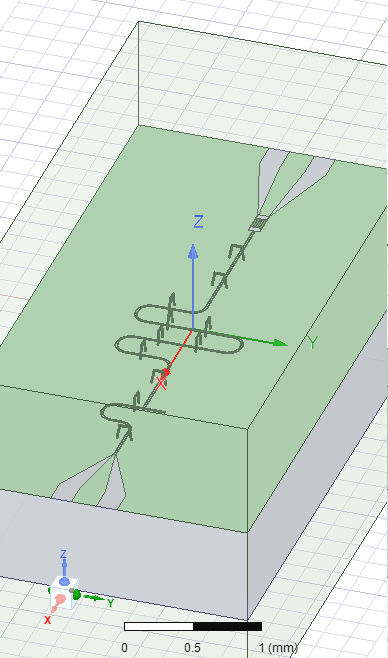

WindowsPath('C:/Users/Airplane/JupyterProject/ansys.png')

In [18]:
##TEST for 'main'
hfss.render_design(['short_to_ground_r', 'rt_meander', 'short_to_ground_p','P1', 
                    'P2','Cap','open_to_ground_1','pumpline', 'squid'],[],box_plus_buffer=False)
hfss.save_screenshot()

In [19]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
setup.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss.pinfo.design.set_variable('Lj', '10 nH')
hfss.pinfo.design.set_variable('Cj', '0 fF')



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



'Cj'

In [20]:
eig_res.sim.close()

# Get the Eigenmode, Eigenfrequency,Field Solution

In [21]:
hfss.start()

INFO 05:58PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:58PM [load_ansys_project]: 	Opened Ansys App
INFO 05:58PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:58PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Airplane/OneDrive - skku.edu/문서/Ansoft/
	Project:   Project2
INFO 05:58PM [connect_design]: 	Opened active design
	Design:    JPA_METAL_why [Solution type: Eigenmode]
INFO 05:58PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:58PM [connect]: 	Connected to project "Project2" and design "JPA_METAL_why" 😀 



True

In [22]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = hfss.get_convergences()
eig_res.sim.plot_convergences()


05:58PM 27s INFO [get_f_convergence]: Saved convergences to C:\Users\Airplane\JupyterProject\hfss_eig_f_convergence.csv


05:58PM 36s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


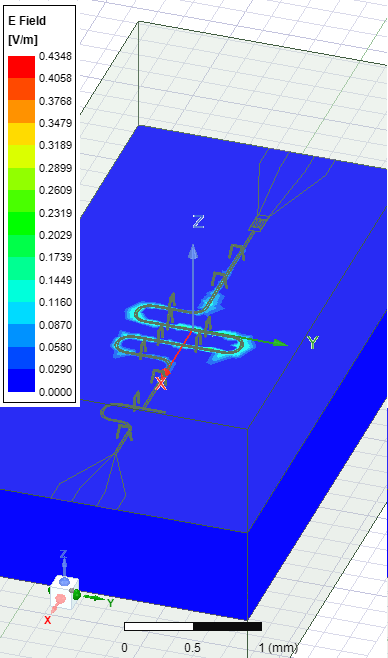

WindowsPath('C:/Users/Airplane/JupyterProject/ansys.png')

In [23]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [24]:
hfss.clear_fields(['Mag_E1'])

In [25]:
hfss.disconnect_ansys() 

# Capacitance

In [33]:
from qiskit_metal.analyses.quantization import LOManalysis
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
c1 = LOManalysis(design, "q3d")

In [34]:
c1.sim.setup['freq_ghz']= '11.6203Ghz'

In [35]:
q3d=c1.sim.renderer

In [36]:
q3d.connect_ansys()

INFO 05:06PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:06PM [load_ansys_project]: 	Opened Ansys App
INFO 05:06PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:06PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Airplane/OneDrive - skku.edu/문서/Ansoft/
	Project:   Test1
INFO 05:06PM [connect_design]: 	Opened active design
	Design:    JPA_METAL_why [Solution type: Eigenmode]
INFO 05:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:06PM [connect]: 	Connected to project "Test1" and design "JPA_METAL_why" 😀 



In [ ]:
c1.sim._get_results_from_renderer()
c1.sim.capacitance_matrix

In [39]:
c1.sim.close()